# World data

## Data Sources

Covid world data available at [ourworldindata.org](https://ourworldindata.org/coronavirus). Several views are already available on this site. 

We want to download the dataset to play with it ourselves. They link us toward this [github](https://github.com/owid/covid-19-data/tree/master/public/data).

Another world covid source : [Center for Systems Science and Engineering (CSSE) at Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19)

Individual death profiling: [INED](https://dc-covid.site.ined.fr/en/data/pooled-datafiles/)

In [1]:
import pandas as pd

In [75]:
df_world = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [76]:
df_world.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [77]:
# df_world['date'] = pd.to_datetime(df_world['date']) 

## Deaths / Vaccines trend

In [78]:
df_world.shape

(212638, 67)

In [85]:
sub_df = df_world[["date", "total_deaths", "new_deaths", "total_vaccinations", "new_vaccinations"]].dropna()

In [86]:
sub_df = sub_df.sort_values(by="date")

In [87]:
sub_df["year_month"] = sub_df['date'].str.slice(0, 7)

In [88]:
sub_df = sub_df.groupby(by="year_month").sum()

In [89]:
sub_df.head()

,total_deaths,new_deaths,total_vaccinations,new_vaccinations
year_month,,,,
2020-12,136210538.0,1006897.0,2.811336e+08,4.001736e+07
2021-01,243179529.0,1617889.0,6.087627e+09,3.600329e+08
2021-02,276972635.0,1243669.0,2.018653e+10,6.428422e+08
2021-03,349654974.0,1224801.0,5.247526e+10,1.410307e+09
2021-04,379522656.0,1523312.0,1.087274e+11,2.210765e+09


In [95]:
first_nd = int(sub_df.new_deaths.iloc[0])
last_nd = int(sub_df.new_deaths.iloc[-1])
nd_diff = ((last_nd - first_nd) / first_nd) * 100

In [98]:
first_nd

1006897

In [99]:
last_nd

226283

In [97]:
nd_diff

-77.52669836140142

In [54]:
sub_df.head()

,date,total_deaths,new_deaths,total_vaccinations,new_vaccinations
61672,2020-12-02,426211.0,5373.0,0.0,0.0
209342,2020-12-02,1569534.0,12393.0,0.0,0.0
83139,2020-12-02,664503.0,7096.0,0.0,0.0
209343,2020-12-03,1582245.0,12711.0,0.0,1.0
83140,2020-12-03,671969.0,7466.0,0.0,1.0


In [55]:
sub_df.tail()

,date,total_deaths,new_deaths,total_vaccinations,new_vaccinations
186878,2022-08-29,9866.0,22.0,60669785.0,40337.0
49555,2022-08-29,40805.0,14.0,17896546.0,4083.0
195016,2022-08-29,100400.0,0.0,151984505.0,23339.0
117665,2022-08-29,36232.0,34.0,72046167.0,3197.0
72437,2022-08-29,147223.0,119.0,184630217.0,13893.0


In [56]:
sub_df.shape

(48388, 5)

In [57]:
per_month = sub_df.date.dt.to_period("M")

In [58]:
sub_df = sub_df.groupby(per_month)

In [60]:
sub_df.head()

,date,total_deaths,new_deaths,total_vaccinations,new_vaccinations
61672,2020-12-02,426211.0,5373.0,0.000000e+00,0.0
209342,2020-12-02,1569534.0,12393.0,0.000000e+00,0.0
83139,2020-12-02,664503.0,7096.0,0.000000e+00,0.0
209343,2020-12-03,1582245.0,12711.0,0.000000e+00,1.0
83140,2020-12-03,671969.0,7466.0,0.000000e+00,1.0
...,...,...,...,...,...
128152,2022-08-01,2748.0,2.0,6.771370e+05,16.0
203105,2022-08-01,2549554.0,667.0,5.277591e+09,1028437.0
59530,2022-08-01,2620.0,0.0,2.003825e+06,865.0
72409,2022-08-01,144150.0,171.0,1.839633e+08,19233.0


In [61]:
sub_df = sub_df.sum()

In [62]:
sub_df.head()

,total_deaths,new_deaths,total_vaccinations,new_vaccinations
date,,,,
2020-12,136210538.0,1006897.0,2.811336e+08,4.001736e+07
2021-01,243179529.0,1617889.0,6.087627e+09,3.600329e+08
2021-02,276972635.0,1243669.0,2.018653e+10,6.428422e+08
2021-03,349654974.0,1224801.0,5.247526e+10,1.410307e+09
2021-04,379522656.0,1523312.0,1.087274e+11,2.210765e+09


In [68]:
sub_df['date'] = sub_df.index

In [69]:
sub_df.head()

,total_deaths,new_deaths,total_vaccinations,new_vaccinations,date
date,,,,,
2020-12,136210538.0,1006897.0,2.811336e+08,4.001736e+07,2020-12
2021-01,243179529.0,1617889.0,6.087627e+09,3.600329e+08,2021-01
2021-02,276972635.0,1243669.0,2.018653e+10,6.428422e+08,2021-02
2021-03,349654974.0,1224801.0,5.247526e+10,1.410307e+09,2021-03
2021-04,379522656.0,1523312.0,1.087274e+11,2.210765e+09,2021-04


In [66]:
import seaborn as sns

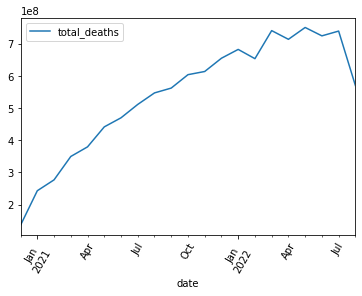

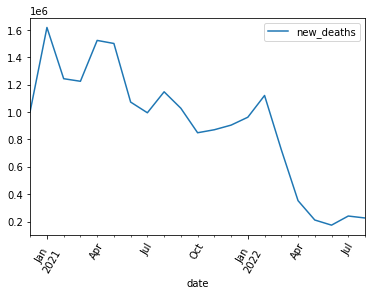

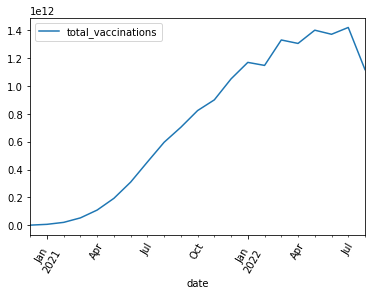

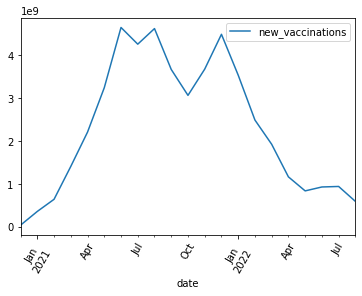

In [70]:
for var in ["total_deaths", "new_deaths", "total_vaccinations", "new_vaccinations"]:
    sub_df.plot(x="date", y=var, rot=60)

# Age profiling

In [7]:
import requests, zipfile, io

response = requests.get("https://www.ined.fr/fichier/rte/166/Page%20Data/Pooled%20Datasets/AgeSex.zip")
myzipfile = zipfile.ZipFile(io.BytesIO(response.content))
with myzipfile.open('AgeSex/Cum_deaths_by_age_sex.csv') as age_sex_csv:
    df_age_sex = pd.read_csv(age_sex_csv)

with myzipfile.open('AgeSex/Population.csv') as pop_csv:
    df_pop = pd.read_csv(pop_csv)
